## 22. Sínussveiflur

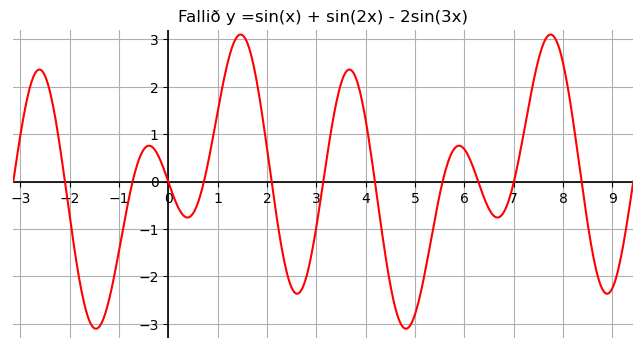

In [228]:
from math import sin, pi
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
def f(x):
    return sin(x) +  sin(2*x)-2*sin(3*x)
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
plt.xlim([-pi, 3*pi])
plt.ylim([-3.3, 3.2])
plt.xticks(np.arange(-3,10,1))
plt.yticks(np.arange(-3,3.1,1))
plt.axvline(lw=1.2, c='k')
plt.axhline(lw=1.2, c='k')
plt.grid(True)
plt.box(False)
x=np.linspace(-pi,3*pi,500)
y=[f(xi) for xi in x]
bspline = interpolate.make_interp_spline(x, y)
y_new = bspline(x)
plt.title("Fallið y =sin(x) + sin(2x) - 2sin(3x)")

plt.plot(x,y, c='r')

plt.show()

## 23. Málmavinnsla

### 1.

In [149]:
def number(k):
    if k%2==0:
        return int((((k+1)*(k+2)*(k+3))/6)+(k/2)-1)
    else:
        return int((((k+1)*(k+2)*(k+3))/6)-2)
a = [number(i) for i in range(1,8)]

print("k          Noble gas")
for i in range(1,8):
    print(f"{i:<10} {number(i)}")

k          Noble gas
1          2
2          10
3          18
4          36
5          54
6          86
7          118


### 2.

In [186]:
def lota(s):
    if s>118:
        raise ValueError("Last element on the periodic table is Oganesson with the element number 118.")
    i = 1
    while s>a[i]:
        i+=1
    return i



def flokkur(y):
    if y == 1:
        return 1
    elif 1<y and y<=(a[lota(y)-1]+2):
        return y-a[lota(y)]
    else:
        return max(3,18+y-a[lota(y)])


flokkur(58)



3

### 3.

In [313]:
def íslenska(s):
    """notað sem 'key' í sort eða sorted til að raða í íslenska stafrófsröð,
    t.d. print(sorted(['ár','bára','bali','akur'], key=íslenska))"""
    return [íslenska.k.get(c.lower(),0) for c in s]
íslenska.a = list('0123456789aábcdðeéfghiíjklmnoópqrstuúvwxyýzþæö')
íslenska.k = dict(zip(íslenska.a, range(1,len(íslenska.a)+1)))


file = "https://cs.hi.is/python/allir-malmar.txt"
(x,y,z,a,b,c) = np.loadtxt(file, dtype=str, delimiter=";", skiprows=1).T

Edlisthyng = np.char.replace(a, ',', '.')
Edlisthyngd = Edlisthyng.astype(float)
Takn = x.astype(str)
Malmur = y.astype(str)
Saetistala = z.astype(int)
Braedslumark = b.astype(int)
Enska = c.astype(str)

SortedList = sorted(Dictionary,key=íslenska)
SortedDict = {i: Dictionary[i] for i in SortedList}

print("Íslenska      Enska")
for i in SortedDict:
    print (i.capitalize().ljust(12), SortedDict[i])


{'aktín': 1050, 'ál': 660, 'barín': 725, 'beryllín': 1278, 'bismút': 271, 'blý': 327, 'dysprósín': 1412, 'erbín': 1522, 'evrópín': 822, 'fransín': 20, 'gadólín': 1311, 'gallín': 30, 'gull': 1064, 'hafnín': 2150, 'hólmín': 1470, 'indín': 157, 'iridín': 2410, 'járn': 1535, 'kadmín': 321, 'kalín': 64, 'kalsín': 839, 'kopar': 1083, 'kóbalt': 1495, 'króm': 1857, 'kvikasilfur': -39, 'lantan': 920, 'litín': 180, 'lútetín': 1656, 'magnesín': 639, 'mangan': 1245, 'mólýbden': 2617, 'natrín': 98, 'neódým': 1010, 'neptún': 640, 'nikkel': 1453, 'níóbín': 2468, 'osmín': 3045, 'palladín': 1552, 'platína': 1772, 'plúton': 640, 'pólon': 254, 'praseódým': 935, 'prometín': 1100, 'prótaktín': 1568, 'radín': 700, 'renín': 3180, 'ródín': 1966, 'rúbidín': 39, 'rúþen': 2250, 'samarín': 1072, 'serín': 795, 'sesín': 28, 'silfur': 962, 'sink': 420, 'sirkon': 1852, 'skandín': 1539, 'strontín': 769, 'tantal': 2996, 'teknetín': 2200, 'terbín': 1360, 'tin': 232, 'títan': 1660, 'túlín': 1545, 'úran': 1132, 'vanadín':

### 4.

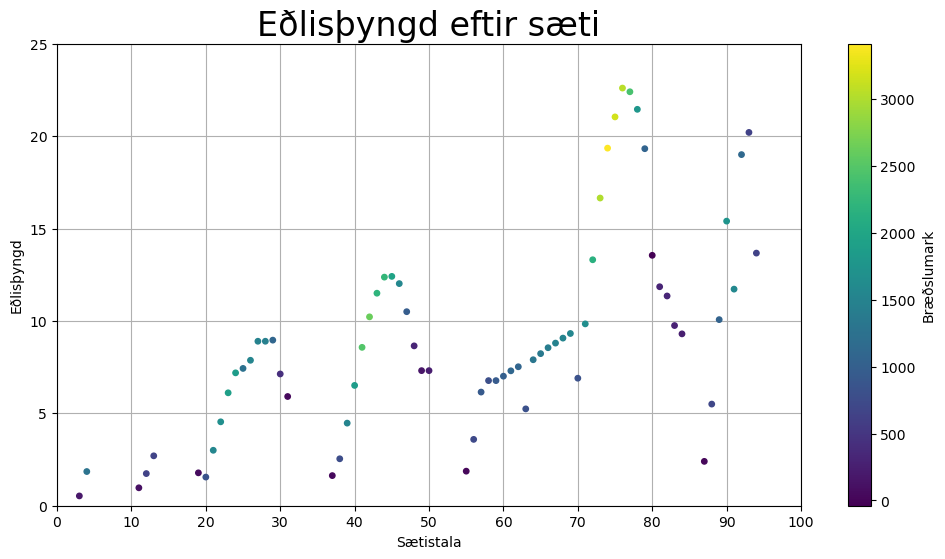

In [288]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlim(0,100)
plt.ylim(0,25)
plt.xticks(np.arange(0,101, 10))
plt.xlabel('Sætistala')
plt.ylabel('Eðlisþyngd')
plt.title("Eðlisþyngd eftir sæti", size=24)
plt.scatter(Saetistala, Edlisthyngd, c=Braedslumark, zorder=3, s=15)
plt.colorbar(label="Bræðslumark")
plt.show()

### 5.

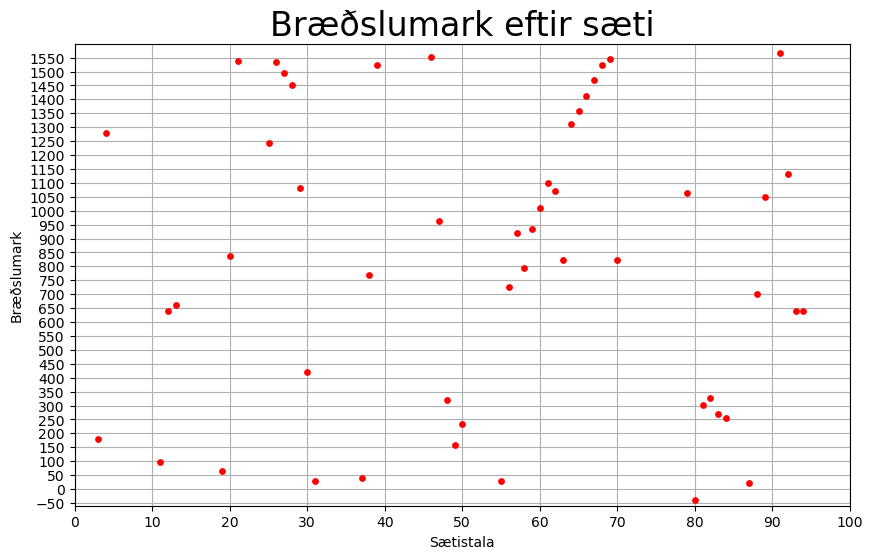

In [310]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlim(0,100)
plt.ylim(-60,1600)
plt.xticks(np.arange(0,101, 10))
plt.xlabel('Sætistala')
plt.ylabel('Bræðslumark')
plt.yticks(np.arange(-50, 1600, 50))
plt.title("Bræðslumark eftir sæti", size=24)
plt.scatter(Saetistala, Braedslumark, zorder=3, s=15, c="r")
plt.show()

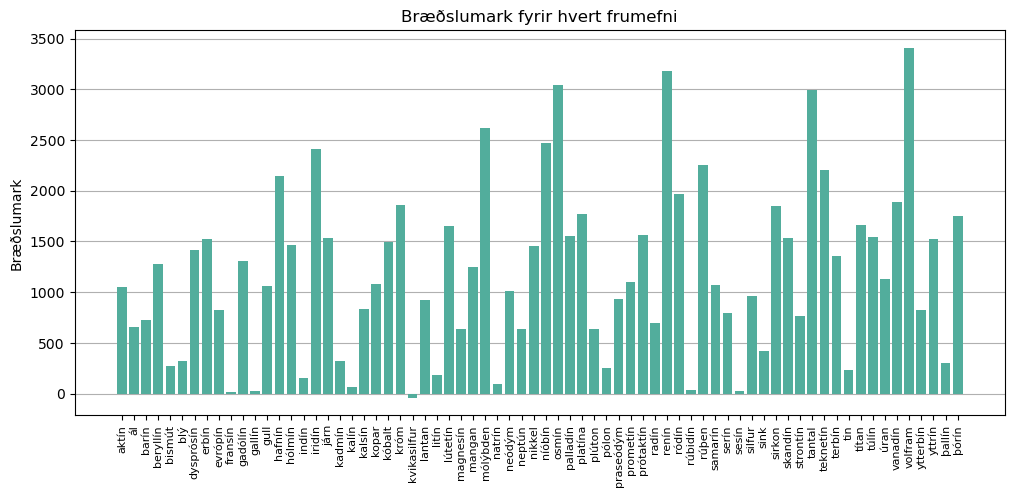

In [343]:
Dictionary = dict(zip(Malmur,Enska))
BraedsluNafn = dict(zip(Malmur, Braedslumark))

SortedList = sorted(BraedsluNafn, key=íslenska)
SortedDict = {i: BraedsluNafn[i] for i in SortedList}

plt.figure(figsize=(12,5))

plt.grid(True, axis='y')
plt.bar(SortedList, SortedDict.values(), color='#52ad9c', linewidth=0.6, zorder=3)
plt.xticks(rotation=90, size=8)
plt.ylabel('Bræðslumark')
plt.title('Bræðslumark fyrir hvert frumefni')
plt.show()